In [2]:
cd /work/hp220105o/i25004/hbi/output

/work/02/hp220105o/i25004/hbi/output


The following scripts visualize the result of 3D simulations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
yr=365*24*3600
plt.rcParams["font.size"] = 14 

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs
4000
22
[1.00000000e-09 1.00000000e-09 1.00000000e-09 ... 4.75543103e-10
 4.76194420e-10 4.76016124e-10]


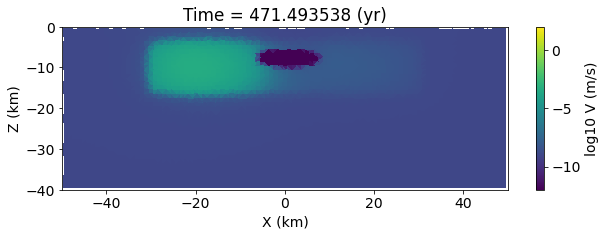

In [29]:
%time
from matplotlib import animation
from mpl_toolkits.axes_grid1 import make_axes_locatable

jobid=201 #BP5t

plt.figure(figsize=(10,3))

d=np.loadtxt('time'+str(jobid)+'.dat')
time=d[:,1]/yr


ary1=np.loadtxt('xyz'+ str(jobid) +'.dat')
nc=len(ary1)
print(nc)
x=ary1[:,0]
y=ary1[:,1]
z=ary1[:,2]

#print(nc)

fp = open('vel'+ str(jobid) +'.dat','rb')
d = np.fromfile(fp, np.float64, -1)
fp.close()
nt=int(len(d)/nc)
print(nt)
print(d)

d=d.reshape(nt,nc)
d=np.log10(d)
    #plt.scatter(x,z,c=vel[2,:],s=10)
#plt.tricontourf(x, z, d[27,:], levels=25,vmin=-12,vmax=2, cmap="bwr")

n=18
plt.title('Time = %f (yr)' %time[n])
plt.tripcolor(x, z, d[n,:], vmin=-12,vmax=2, cmap="viridis")
plt.xlim([-50,50])
plt.ylim([-40,0])
plt.xlabel('X (km)')
plt.ylabel('Z (km)')
plt.colorbar(label='log10 V (m/s)')

CPU times: user 1e+03 ns, sys: 2 µs, total: 3 µs
Wall time: 5.96 µs
4000
22
[1.00000000e-09 1.00000000e-09 1.00000000e-09 ... 4.75543103e-10
 4.76194420e-10 4.76016124e-10]


/tmp/ipykernel_717789/1740084640.py:33: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


<Figure size 720x216 with 0 Axes>

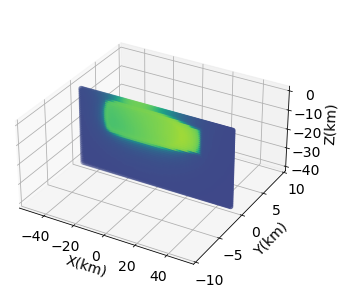

In [31]:
%time
#making animation for slip rate evolution (example for bp5r)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D

jobid=201

plt.figure(figsize=(10,3))

ary1=np.loadtxt('xyz'+ str(jobid) +'.dat')
nc=len(ary1)
print(nc)
x=ary1[:,0]
y=ary1[:,1]
z=ary1[:,2]

#print(nc)

fp = open('vel'+ str(jobid) +'.dat','rb')
d = np.fromfile(fp, np.float64, -1)
fp.close()
nt=int(len(d)/nc)
print(nt)
print(d)

d=d.reshape(nt,nc)
d=np.log10(d)
fig=plt.figure(figsize=plt.figaspect(0.5))
ax = Axes3D(fig)
ax.set_box_aspect((4, 4, 2))
ax.scatter(x,y,z,c=d[1,:],vmin=-12,vmax=2)
ax.set_xlabel("X(km)")
ax.set_ylabel("Y(km)")
ax.set_zlabel("Z(km)")
ax.set_ylim([-10,10])

ax.view_init(elev=30.)

plt.show()